In [1]:
from skimage import data,color,filters
import  matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

#imgread with matplotlib.image
original_img=mpimg.imread("./test_image13.jpg",'jpg')

#imgread with cv2 是为了看cv2对图像的读入与matplotlib读入会不会对后续有较大影响，发现并没有
# bgr_img = cv2.imread("./test.jpg")
# rgb_img = bgr_img[:,:,::-1]

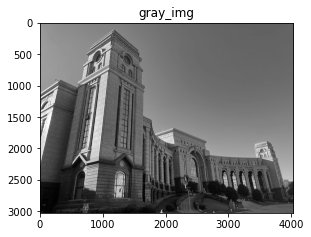

In [2]:
#convert into Gray img
imgGray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
# imgGray_cv2 = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
plt.figure('imgs',[10,8])
plt.subplot(121).set_title('gray_img')
plt.imshow(imgGray,cmap='gray')
# plt.subplot(122).set_title('gray_img_cv2')
# plt.imshow(imgGray_cv2,cmap='gray')

#这里不建议使用skimage的color，因为会把像素值压缩到[0,1]
# imgGray = color.rgb2gray(original_img)
# imgGray_cv2 = color.rgb2gray(rgb_img)

In [3]:
# define sobel kernel and useful functions
def padding(img): # 为了保证原有图像大小尺寸在卷积操作后不变
    t_img = np.pad(img,[1,1])
    t_img[0] = t_img[2]       # img的第二行作为t_img的第一行
    t_img[-1] = t_img[-3]     # img的倒数第二行作为t_img的最后一行
    t_img[:,0] = t_img[:,2]    # img的第二行作为t_img的第一列
    t_img[:,-1]= t_img[:,-3]  #img的倒数第二列作为t_img的最后一列
    return t_img

def sobel_cal(img,dx,dy):
    s_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    s_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    s_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    pad_img = padding(img)
    sobeled_img = np.zeros(img.shape)
    if dx == 1 and dy == 0:  # 计算x方向梯度
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                sobeled_img[i,j]= np.sum(pad_img[i:i+3,j:j+3]*s_x)
    elif dx == 0 and dy == 1:  # 计算y方向梯度
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                sobeled_img[i,j]= np.sum(pad_img[i:i+3,j:j+3]*s_y)
    else:
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                sobeled_img[i,j]= np.sum(pad_img[i:i+3,j:j+3]*s_sharpen)
    return sobeled_img


In [4]:
# Sobel calculation 
x_edge_img = sobel_cal(imgGray,1,0)
y_edge_img = sobel_cal(imgGray,0,1)
sharpen_img =sobel_cal(imgGray,1,1)
# x_edge_img_cv2 = sobel_cal(imgGray_cv2,1,0)
# y_edge_img_cv2 = sobel_cal(imgGray_cv2,0,1)
# if np.all((cv2.Sobel(imgGray,cv2.CV_16S,1,0)-x_edge_img) == 0):
#     if np.all((cv2.Sobel(imgGray_cv2,cv2.CV_16S,0,1)-y_edge_img_cv2) == 0):
#         print('Self-defined Sobel funtion has exactly the same effect as cv2.Sobel()')

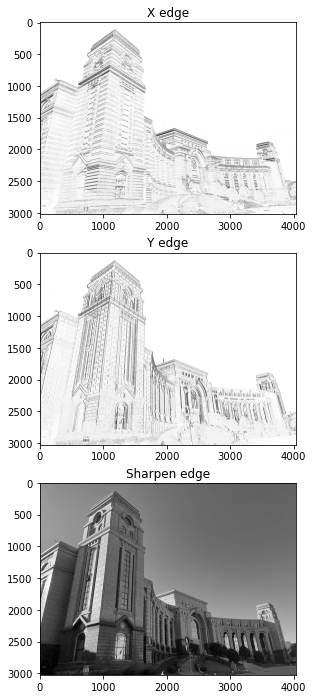

In [5]:
# Linearly Scale pixel value to [0,255], 以增加图像对比度
def ScaleAbs(img,alpha,beta):
    # y = saturate(|alpha * x + beta|), where "saturate" means if y>255, then y = 255
    ScaleAbs_img = np.abs(np.float64(alpha)*img+np.float64(beta))
    ScaleAbs_img[ScaleAbs_img>255] = 255 # saturate
    ScaleAbs_img = np.round(ScaleAbs_img).astype(np.uint8)
    return ScaleAbs_img

# ScaleAbs前像素值范围为X:[-939.0 974.0]，Y:[-923.0 985.0]
# print(x_edge_img.min(),x_edge_img.max(),y_edge_img.min(),y_edge_img.max())

AbsX = ScaleAbs(x_edge_img,1,0) # ScaleAbs X edge
AbsY = ScaleAbs(y_edge_img,1,0) # ScaleAbs Y edge
AbsSharpen = ScaleAbs(sharpen_img,1,0) # ScaleAbs sharpened edge
plt.figure('edges',[15,12])
plt.subplot(311).set_title('X edge')
plt.imshow(255-AbsY,cmap='gray')
# plt.colorbar()
plt.subplot(312).set_title('Y edge')
plt.imshow(255-AbsX,cmap='gray')
# plt.colorbar()
plt.subplot(313).set_title('Sharpen edge')
plt.imshow(AbsSharpen,cmap='gray')

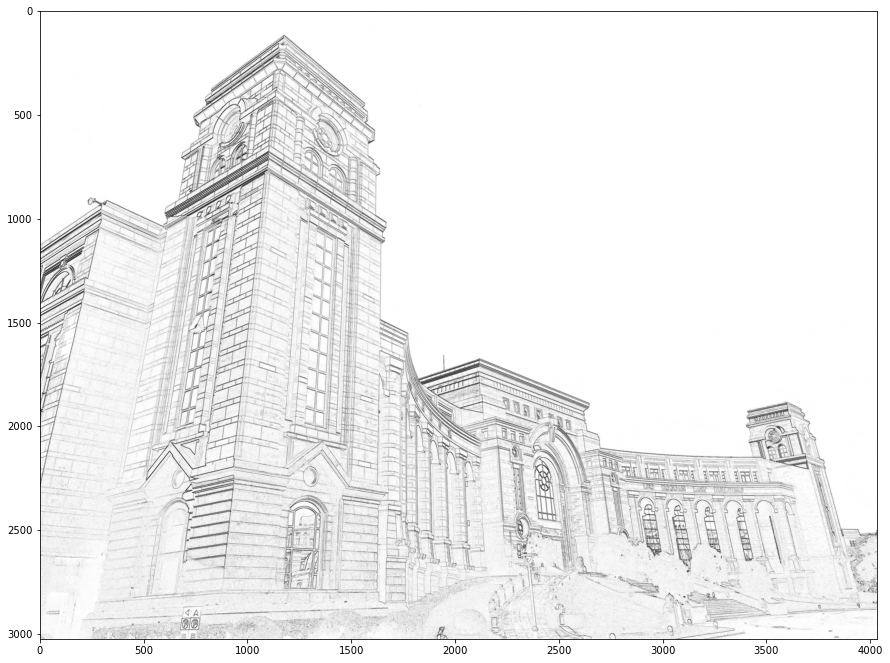

In [14]:
# Add weighted x_edge and y_edge with weight 0.5,0.5
edge_img = (0.4 * AbsX + 0.6 * AbsY)
plt.figure('Edge Detection',[15,12])
plt.imshow(255-edge_img,cmap='gray')
mpimg.imsave('./edge_img.png',edge_img,cmap = 'gray',dpi = 300)

In [15]:
# save image
mpimg.imsave('./Simulated_edge_img.png',255-edge_img,cmap = 'gray',dpi = 300)
mpimg.imsave('./Simulated_Y_edge.png',255-AbsX,cmap = 'gray',dpi = 300)
mpimg.imsave('./Simulated_X_edge.png',255-AbsY,cmap = 'gray',dpi = 300)
mpimg.imsave('./Simulated_sharpen_edge.png',AbsSharpen,cmap = 'gray',dpi = 300)

In [16]:
mpimg.imsave('./imgGray.png',imgGray,cmap = 'gray',dpi = 300)

In [8]:
AbsSharpen[200:220,300:303]

array([[143, 143, 143],
       [143, 143, 143],
       [143, 143, 143],
       [142, 143, 143],
       [146, 141, 143],
       [144, 146, 142],
       [144, 145, 141],
       [144, 144, 145],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144],
       [144, 144, 144]], dtype=uint8)

In [9]:
AbsX[200:220,300:303]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 0],
       [2, 3, 1],
       [1, 4, 3],
       [0, 3, 3],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

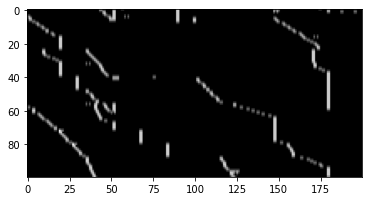

In [10]:
plt.imshow(AbsX[200:300,300:500],cmap='gray')